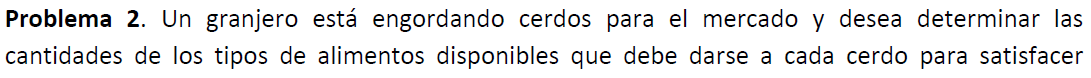

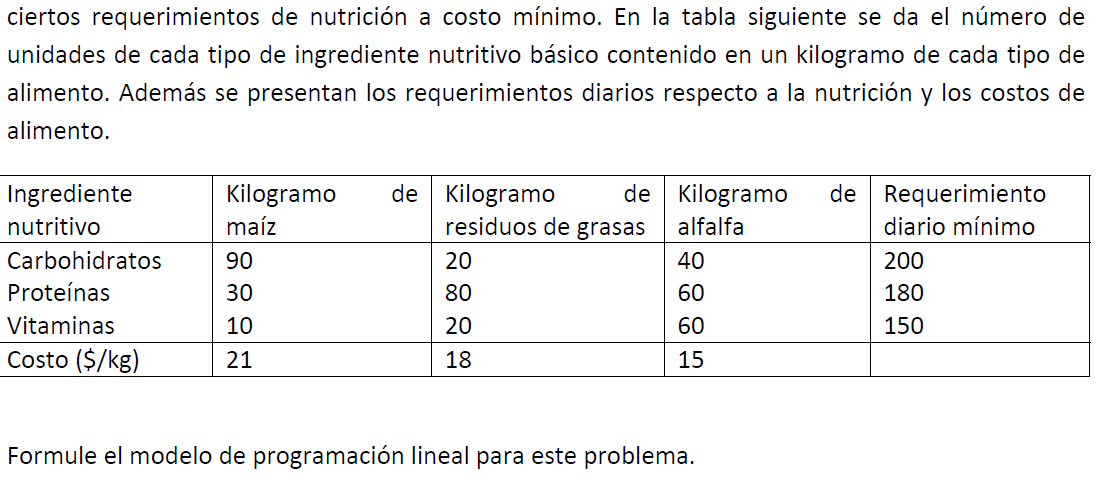

## Sets
I es el conjunto de ingredientes nutritivos (i = 1 son carbohidratos, i = 2 son proteinas, i = 3 son vitaminas)\
J es el conjunto de alimentos (j = 1 es maiz, j = 2 es residuos de grasas, j = 3 es alfalfa)

In [13]:
import pyomo.environ as pe
import pyomo.opt as po

In [14]:
model = pe.ConcreteModel()

In [15]:
model.I = pe.RangeSet(1,3)
model.J = pe.RangeSet(1,3)

## Parameters
Cj es el costo unitario del alimento j (unidad monetaria $ por kg)\
Uij es el número de unidades del ingrediente i contenido en un kg del tipo de alimento j (unidad por kg)\
Reqi es el requerimiento diario del ingrediente nutritivo i (unidades diarias)

In [16]:
C = {1: 21, 2: 18, 3: 15}
Req = {1: 200, 2: 180, 3: 150}
U =  {(1,1): 90, (1,2): 20, (1,3): 40,
      (2,1): 30, (2,2): 80, (2,3): 60,
      (3,1): 10, (3,2): 20, (3,3): 60}

In [17]:
model.C = pe.Param(model.J, initialize = C) #Costo unitario
model.Req = pe.Param(model.I, initialize = Req) #Requerimiento diario mínimo 
model.U = pe.Param(model.I, model.J, initialize = U) #Unidades por kg

## Variables
xj es la cantidad de kg requeridos del tipo de alimetento j

In [18]:
model.x = pe.Var(model.J, domain = pe.NonNegativeReals)

## Objective

In [19]:
Z = sum(model.C[j] * model.x[j] for j in model.J)
model.objective = pe.Objective(sense = pe.minimize, expr = Z)
model.objective.pprint()

objective : Size=1, Index=None, Active=True
    Key  : Active : Sense    : Expression
    None :   True : minimize : 21*x[1] + 18*x[2] + 15*x[3]


## Constraints

In [20]:
model.requerimiento_diario = pe.ConstraintList()
for i in model.I:
    lhs = sum(model.U[i,j] * model.x[j] for j in model.J)
    rhs = model.Req[i]
    model.requerimiento_diario.add(lhs >= rhs)
model.requerimiento_diario.pprint()

requerimiento_diario : Size=3, Index=requerimiento_diario_index, Active=True
    Key : Lower : Body                        : Upper : Active
      1 : 200.0 : 90*x[1] + 20*x[2] + 40*x[3] :  +Inf :   True
      2 : 180.0 : 30*x[1] + 80*x[2] + 60*x[3] :  +Inf :   True
      3 : 150.0 : 10*x[1] + 20*x[2] + 60*x[3] :  +Inf :   True


## Solver 

In [21]:
solver = po.SolverFactory('glpk')
results = solver.solve(model, tee = True)

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\JRODRI~1.VIL\AppData\Local\Temp\tmpwa7mrwdk.glpk.raw --wglp
 C:\Users\JRODRI~1.VIL\AppData\Local\Temp\tmp8xqbpzu0.glpk.glp --cpxlp C:\Users\JRODRI~1.VIL\AppData\Local\Temp\tmp24q02k1n.pyomo.lp
Reading problem data from 'C:\Users\JRODRI~1.VIL\AppData\Local\Temp\tmp24q02k1n.pyomo.lp'...
4 rows, 4 columns, 10 non-zeros
36 lines were read
Writing problem data to 'C:\Users\JRODRI~1.VIL\AppData\Local\Temp\tmp8xqbpzu0.glpk.glp'...
28 lines were written
GLPK Simplex Optimizer 5.0
4 rows, 4 columns, 10 non-zeros
Preprocessing...
3 rows, 3 columns, 9 non-zeros
Scaling...
 A: min|aij| =  1.000e+01  max|aij| =  9.000e+01  ratio =  9.000e+00
GM: min|aij| =  5.208e-01  max|aij| =  1.920e+00  ratio =  3.686e+00
EQ: min|aij| =  2.722e-01  max|aij| =  1.000e+00  ratio =  3.674e+00
Constructing initial basis...
Size of triangular part is 3
      0: obj =   0.000000000e+00 inf =   7.818e+00 (3)
      3: obj =   1

In [22]:
for j in model.J:
    print(pe.value(model.x[j]))
print(pe.value(model.objective))

1.14285714285714
0.0
2.42857142857143
60.42857142857139
